
<div class="alert alert-block alert-danger">

## <span style=" color:Purple"> Seaborn - Part 3</span>



In [1]:
# Basic Libraries
import pandas as pd
import numpy as np

# Libraries for visualizaton
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore') 

<div class="alert alert-block alert-success ">

# <span style=" color:Purple"> Catplot
This function provides access to several axes-level functions that show the relationship between a numerical and one or more categorical variables using one of several visual representations.
- seaborn.catplot(*, x=None, y=None, hue=None, data=None, row=None, col=None, col_wrap=None, estimator=<function mean at 0x7ff320f315e0>, ci=95, n_boot=1000, units=None, seed=None, order=None, hue_order=None, row_order=None, col_order=None, kind='strip', height=5, aspect=1, orient=None, color=None, palette=None, legend=True, legend_out=True, sharex=True, sharey=True, margin_titles=False, facet_kws=None, **kwargs)</span>

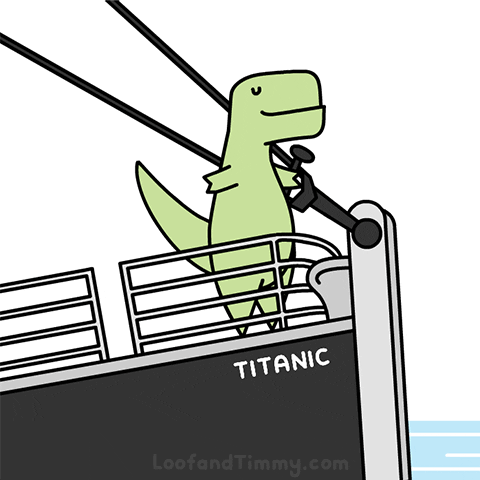

In [2]:
titanic = sns.load_dataset("titanic")
titanic.head(1)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.25,S,Third,man,True,NaN,Southampton,no,False


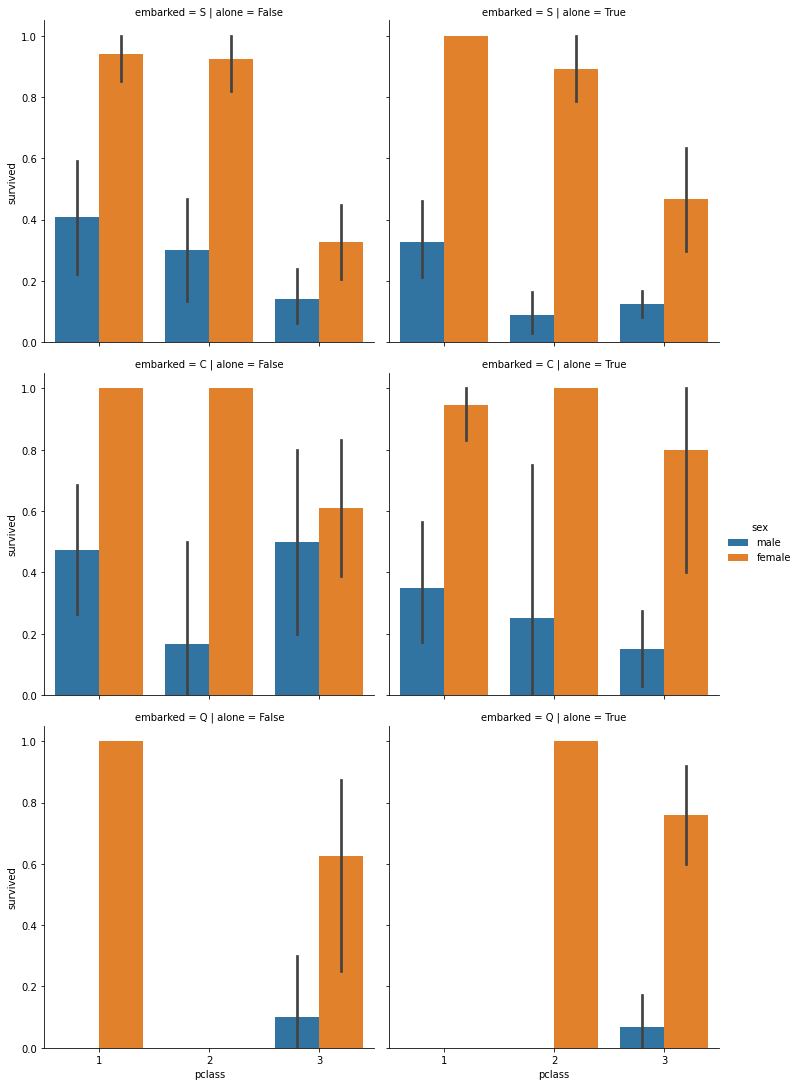

In [3]:
sns.catplot(x = "pclass", y = "survived", data = titanic, kind="bar", estimator=np.mean, hue = "sex",col = "alone", row = "embarked");

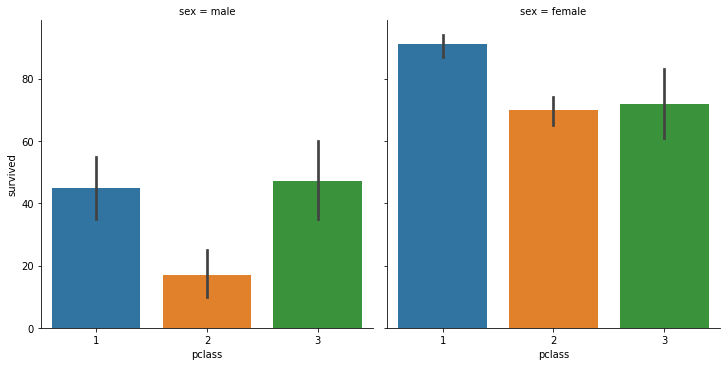

In [4]:
sns.catplot(x = "pclass", y = "survived", data = titanic, kind="bar", estimator=np.count_nonzero, col = "sex")


In [5]:
tips = sns.load_dataset("tips")
tips.head(1)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2


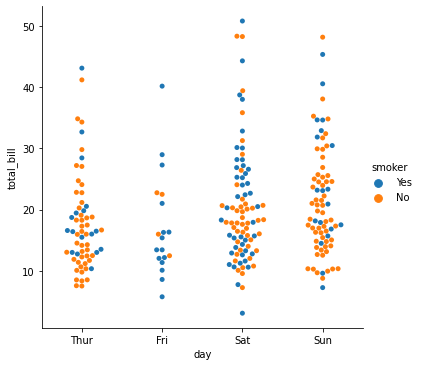

In [6]:
sns.catplot(x="day", y='total_bill',data=tips, kind="swarm", hue ="smoker") 

In [7]:
############################################################################################################################

<div class="alert alert-block alert-success ">

# <span style=" color:Purple"> Jointplot 
Draw a plot of two variables with bivariate and univariate graphs.

This function provides a convenient interface to the JointGrid class, with several canned plot kinds. This is intended to be a fairly lightweight wrapper; if you need more flexibility, you should use JointGrid directly.
- seaborn.jointplot(*, x=None, y=None, data=None, kind='scatter', color=None, height=6, ratio=5, space=0.2, dropna=False, xlim=None, ylim=None, marginal_ticks=False, joint_kws=None, marginal_kws=None, hue=None, palette=None, hue_order=None, hue_norm=None, **kwargs)</span>

In [8]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


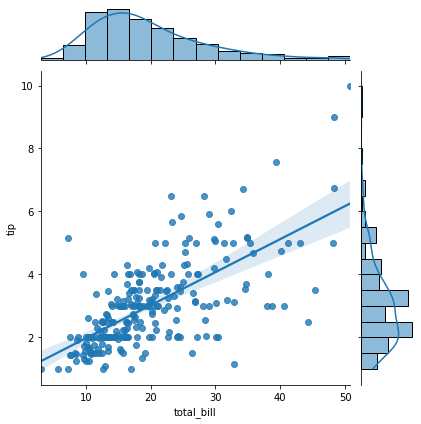

In [9]:
sns.jointplot(x='total_bill',y='tip',data=tips, kind = "reg")


In [10]:
############################################################################################################################

<div class="alert alert-block alert-success ">

# <span style=" color:Purple"> Pairplot 
Plot pairwise relationships in a dataset.

By default, this function will create a grid of Axes such that each numeric variable in data will by shared across the y-axes across a single row and the x-axes across a single column. The diagonal plots are treated differently: a univariate distribution plot is drawn to show the marginal distribution of the data in each column.

It is also possible to show a subset of variables or plot different variables on the rows and columns.

This is a high-level interface for PairGrid that is intended to make it easy to draw a few common styles. You should use PairGrid directly if you need more flexibility.
- seaborn.pairplot(data, *, hue=None, hue_order=None, palette=None, vars=None, x_vars=None, y_vars=None, kind='scatter', diag_kind='auto', markers=None, height=2.5, aspect=1, corner=False, dropna=False, plot_kws=None, diag_kws=None, grid_kws=None, size=None)</span>

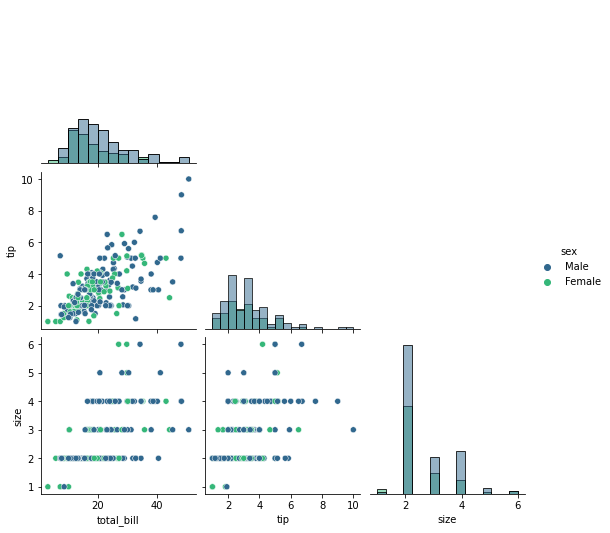

In [11]:
sns.pairplot(tips, hue = "sex", palette = "viridis", corner=True, diag_kind='hist')


In [12]:
############################################################################################################################

<div class="alert alert-block alert-success ">

# <span style=" color:Purple"> PairGrid 
This object maps each variable in a dataset onto a column and row in a grid of multiple axes. Different axes-level plotting functions can be used to draw bivariate plots in the upper and lower triangles, and the the marginal distribution of each variable can be shown on the diagonal.</span>

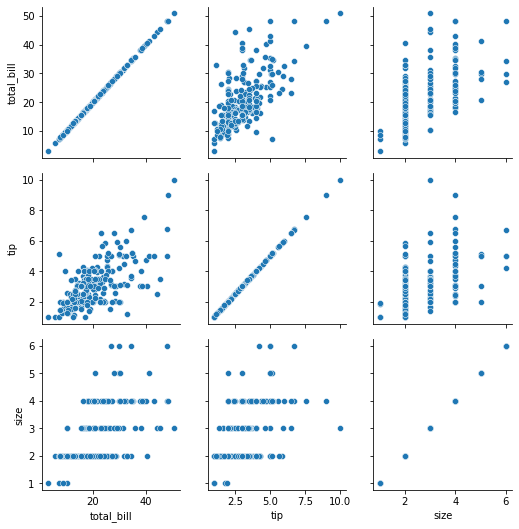

In [13]:
g = sns.PairGrid(tips)
g = g.map(sns.scatterplot)


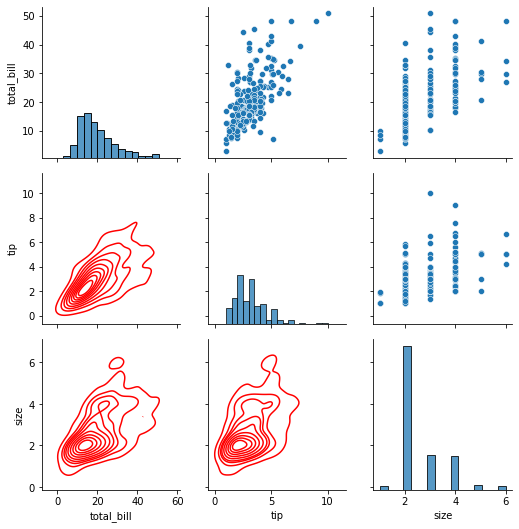

In [14]:
g = sns.PairGrid(tips)

g = g.map_upper(sns.scatterplot)
g = g.map_diag(sns.histplot)
g = g.map_lower(sns.kdeplot,color="red")

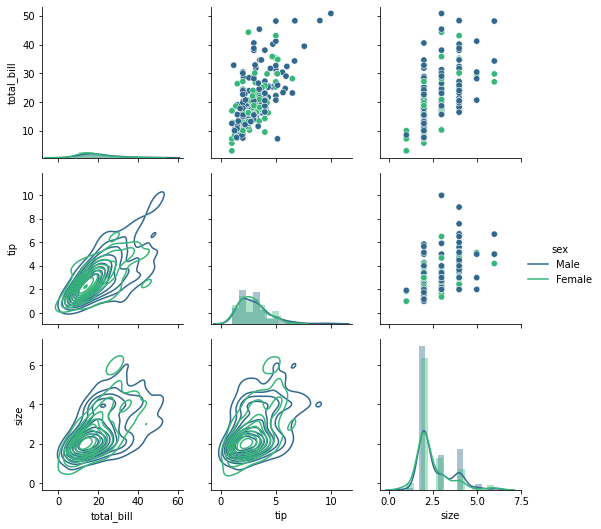

In [15]:
g = sns.PairGrid(tips, hue="sex", palette="viridis")
g = g.map_upper(sns.scatterplot, linewidths=1, edgecolor="w", s=40)
g = g.map_diag(sns.distplot)
g = g.map_lower(sns.kdeplot)
g = g.add_legend();

In [16]:
############################################################################################################################

<div class="alert alert-block alert-success ">

# <span style=" color:Purple"> FacetGrid 
Initialize the matplotlib figure and FacetGrid object.

This class maps a dataset onto multiple axes arrayed in a grid of rows and columns that correspond to levels of variables in the dataset. The plots it produces are often called “lattice”, “trellis”, or “small-multiple” graphics.

It can also represent levels of a third variable with the hue parameter, which plots different subsets of data in different colors. This uses color to resolve elements on a third dimension, but only draws subsets on top of each other and will not tailor the hue parameter for the specific visualization the way that axes-level functions that accept hue will.</span>

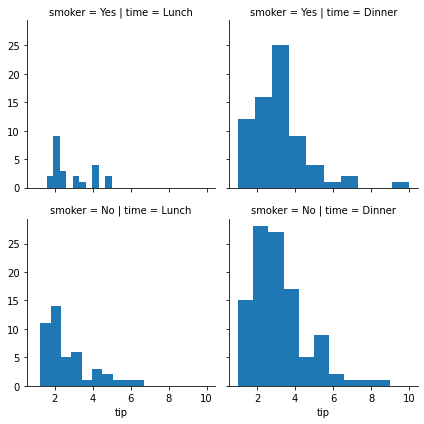

In [17]:
g = sns.FacetGrid(data = tips, col="time", row="smoker")
g = g.map(plt.hist, "tip")


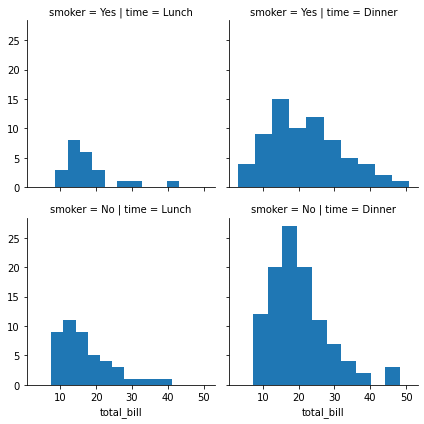

In [18]:
g = sns.FacetGrid(data = tips, col="time", row="smoker")
g = g.map(plt.hist, "total_bill")


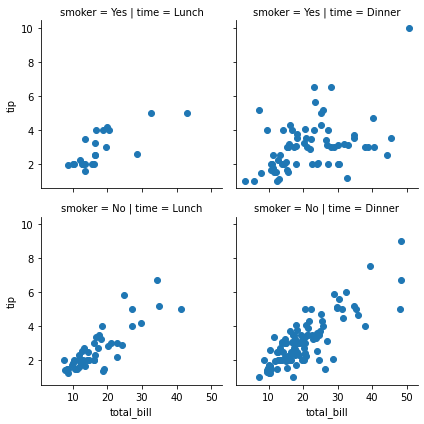

In [19]:
g = sns.FacetGrid(data = tips, col="time", row="smoker")
g = g.map(plt.scatter, "total_bill","tip")

In [20]:
############################################################################################################################

<div class="alert alert-block alert-success ">

# <span style=" color:Purple"> Heatmap 
Plot rectangular data as a color-encoded matrix.

This is an Axes-level function and will draw the heatmap into the currently-active Axes if none is provided to the ax argument. Part of this Axes space will be taken and used to plot a colormap, unless cbar is False or a separate Axes is provided to cbar_ax.
- seaborn.heatmap(data, *, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs)</span>

In [21]:
tips.head(1)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2


<AxesSubplot:>

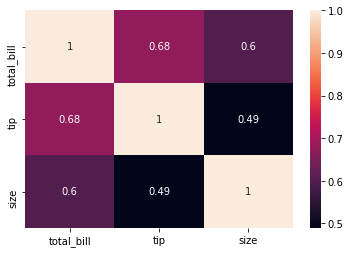

In [22]:
sns.heatmap(data=tips.corr(), annot=True)

<AxesSubplot:>

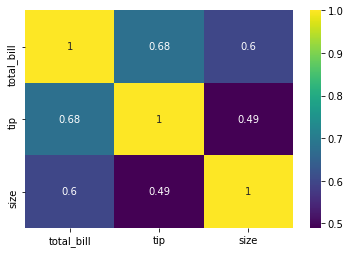

In [23]:
sns.heatmap(data=tips.corr(), cmap='viridis',annot=True)

<AxesSubplot:>

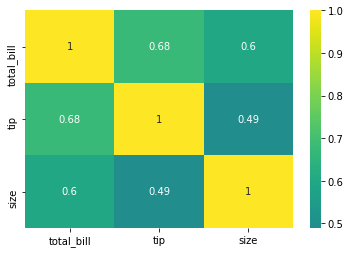

In [24]:
sns.heatmap(data=tips.corr(),cmap='viridis',annot=True,center=0.5)

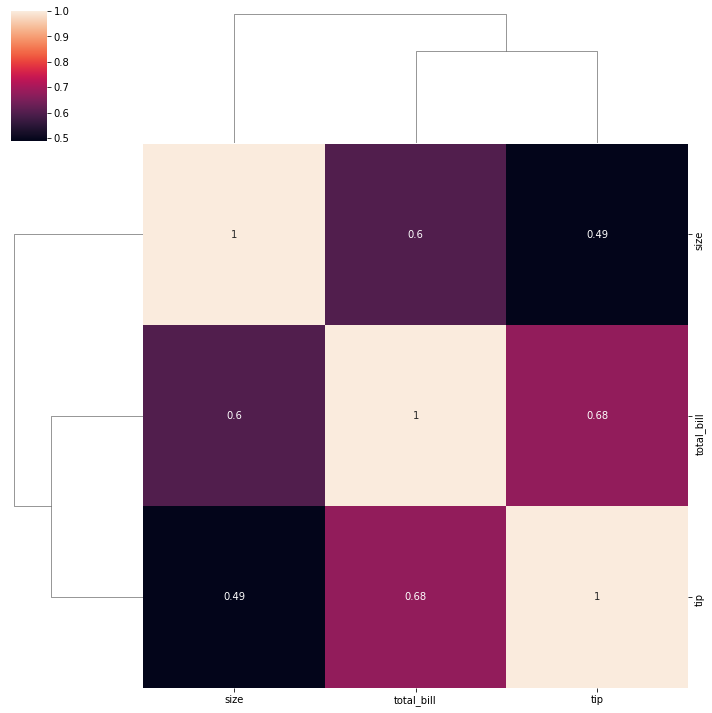

In [25]:
sns.clustermap(tips.corr(), annot=True )

In [26]:
iris

NameError: name 'iris' is not defined

In [ ]:
iris = sns.load_dataset("iris")
species = iris.pop("species")
sns.clustermap(iris)

The iris dataset contains observations of three iris species: Iris-setosa, Iris-versicolor, and Iris-virginica.
There are 50 observations of each species for a total of 150 observations with 4 features each (sepal length, sepal width, petal length, petal width).

https://www.pluralsight.com/guides/designing-a-machine-learning-model